In [1]:
import pandas as pd
import numpy as np
import traceback
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

# Problem Statement: Building Logistic Regression to check who survived on Titanic ship

### Data Gathering

In [4]:
df = pd.read_csv('titanic (1).csv')
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.PassengerId

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [8]:
df.drop(['PassengerId','Cabin'],axis=1, inplace=True)

In [9]:
df.Survived.unique()

array([0, 1, 2, 4], dtype=int64)

In [10]:
df.loc[(df['Survived']==2)|(df['Survived']==4)]

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
24,2,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,S
26,4,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,C


In [12]:
df.Gender.unique()

array(['male', 'female'], dtype=object)

<AxesSubplot:xlabel='Survived', ylabel='count'>

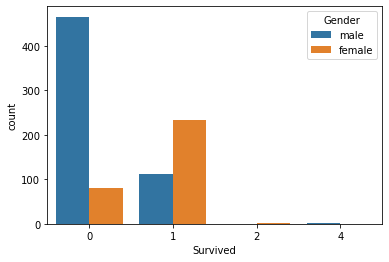

In [15]:
sns.countplot(x = 'Survived', data = df, hue='Gender')

<AxesSubplot:xlabel='Survived', ylabel='count'>

<AxesSubplot:xlabel='Survived', ylabel='count'>

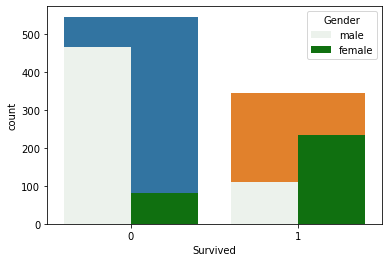

In [20]:
from dis import dis


display(sns.countplot(x='Survived',data=df))
display(sns.countplot(x='Survived',data=df,hue='Gender',color='Green'))

In [16]:
df.Survived.replace({2:1,4:0},inplace=True)

In [17]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [18]:
df.Survived.value_counts()

0    546
1    345
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

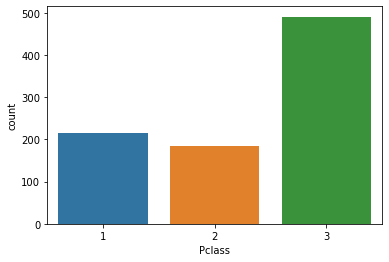

In [21]:
sns.countplot(x='Pclass',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

<AxesSubplot:xlabel='Pclass', ylabel='count'>

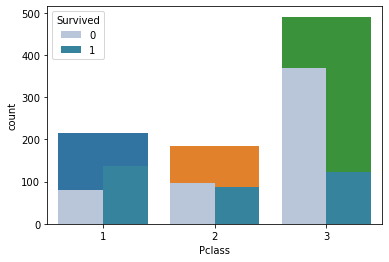

In [23]:

display(sns.countplot(x='Pclass',data=df))
display(sns.countplot(x='Pclass',data=df,hue='Survived',palette='PuBuGn'))

In [24]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='SibSp'>

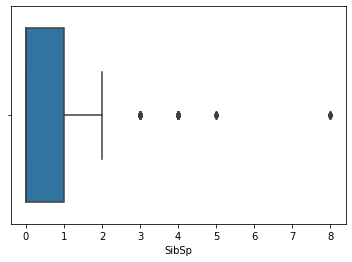

In [27]:
sns.boxplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Fare'>

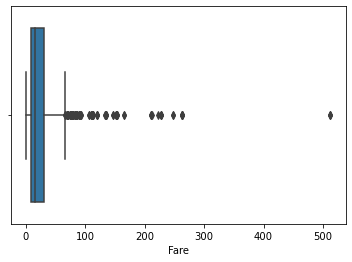

In [28]:
sns.boxplot(x='Fare',data=df)

<AxesSubplot:>

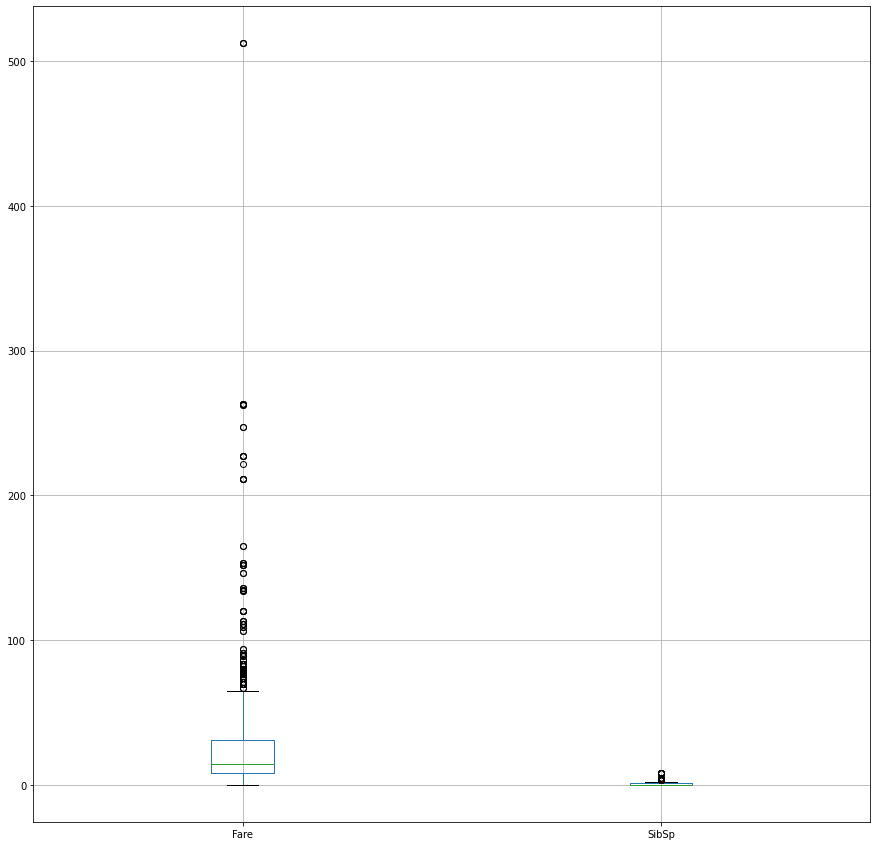

In [32]:
plt.figure(figsize=(15,15))
df.boxplot(column=['Fare','SibSp'])

In [34]:
df[df.SibSp>2].shape

(46, 10)

In [35]:
df[df.Fare>200].shape

(20, 10)

In [37]:
df = df[df.Fare<200]

In [39]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [40]:
df.Embarked.isnull().sum()

2

In [41]:
df.Embarked.value_counts()

S    636
C    156
Q     77
Name: Embarked, dtype: int64

In [42]:
df.Embarked.fillna('S',inplace=True)

c:\Users\Pratik\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [43]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [44]:
df.Gender.unique()

array(['male', 'female'], dtype=object)

In [45]:
df.Embarked.replace({'S':0,'C':1,'Q':2},inplace=True)
df.Gender.replace({'female':0,'male':1},inplace=True)

c:\Users\Pratik\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  871 non-null    int64  
 1   Pclass    871 non-null    int64  
 2   Name      871 non-null    object 
 3   Gender    871 non-null    int64  
 4   Age       696 non-null    float64
 5   SibSp     871 non-null    int64  
 6   Parch     871 non-null    int64  
 7   Ticket    871 non-null    object 
 8   Fare      871 non-null    float64
 9   Embarked  871 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 74.9+ KB


In [49]:
df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 871, dtype: object

In [50]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 871, dtype: object

In [51]:
df = df.drop(['Name','Ticket'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  871 non-null    int64  
 1   Pclass    871 non-null    int64  
 2   Gender    871 non-null    int64  
 3   Age       696 non-null    float64
 4   SibSp     871 non-null    int64  
 5   Parch     871 non-null    int64  
 6   Fare      871 non-null    float64
 7   Embarked  871 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 61.2 KB


In [53]:
df.Age = df.Age.fillna(df.Age.mean())

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  871 non-null    int64  
 1   Pclass    871 non-null    int64  
 2   Gender    871 non-null    int64  
 3   Age       871 non-null    float64
 4   SibSp     871 non-null    int64  
 5   Parch     871 non-null    int64  
 6   Fare      871 non-null    float64
 7   Embarked  871 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 61.2 KB


# Splitting Data & Trining Model

In [55]:
x = df.drop('Survived',axis=1)
y = df.Survived

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=52)

# Creating an instance of the model

In [57]:
log_reg = LogisticRegression()

In [58]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)